<a href="https://colab.research.google.com/github/ggutierrezf/ALURA-CHALLENGE-02/blob/main/telecomx_latam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [ ]:
import pandas as pd

In [ ]:
# Carga de  datos de la BD JSON

df = pd.read_json('/content/TelecomX_Data.json')
display(df.head(2))

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [ ]:
# Aplanando las Columnas ("customer", "phone", "internet", "account")

customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

display(customer_df.head(2))
display(phone_df.head(2))
display(internet_df.head(2))
display(account_df.head(2))

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9


,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes


,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes


,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4


In [ ]:
# Incorporar las columnas aplanadas en el data frame

df = pd.concat([df, customer_df, phone_df, internet_df, account_df], axis=1)
display(df.head(2))

,customerID,Churn,customer,phone,internet,account,gender,SeniorCitizen,Partner,Dependents,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4


In [ ]:
# Eliminando las columnas que fueron aplanadas.

df = df.drop(['customer', 'phone', 'internet', 'account'], axis=1)
display(df.head(2))

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4


In [ ]:
# Analisar los datos de los registros
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')

for col in df.columns:
    print(f"Nombre Columna: {col}")
    print(f"Tipo de Dato: {df[col].dtype}")
    print(f"Valores Nulos: {df[col].isnull().sum()}")
    print(f"Total de Registros: {df[col].size}")
    if df[col].dtype in ['int64', 'float64']:
        print(f"Valor Minimo: {df[col].min()}")
        print(f"Valor Maximo: {df[col].max()}")
    else:
        print("Detalle de los registros:")
        print(df[col].value_counts())
    print("-" * 20)

Nombre Columna: customerID
Tipo de Dato: object
Valores Nulos: 0
Total de Registros: 7267
Detalle de los registros:
customerID
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
9970-QBCDA    1
9968-FFVVH    1
             ..
0014-BMAQU    1
0013-SMEOE    1
0013-MHZWF    1
0013-EXCHZ    1
0011-IGKFF    1
Name: count, Length: 7267, dtype: int64
--------------------
Nombre Columna: Churn
Tipo de Dato: object
Valores Nulos: 0
Total de Registros: 7267
Detalle de los registros:
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64
--------------------
Nombre Columna: gender
Tipo de Dato: object
Valores Nulos: 0
Total de Registros: 7267
Detalle de los registros:
gender
Male      3675
Female    3592
Name: count, dtype: int64
--------------------
Nombre Columna: SeniorCitizen
Tipo de Dato: int64
Valores Nulos: 0
Total de Registros: 7267
Valor Minimo: 0
Valor Maximo: 1
--------------------
Nombre Columna: Partner
Tipo de Dato: object
Valores Nulos: 0
Total de Registros: 7267
Detalle 

In [ ]:
# Verificar si hay registros duplicados
registros_duplicados = df.duplicated().sum()

print(f"Numero de registros duplicados: {registros_duplicados}")

Numero de registros duplicados: 0


In [ ]:
# Eliminar el campo "customerID" por ser irrelevante para el analisis
df = df.drop('customerID', axis=1)
display(df.head(2))

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4


In [ ]:
# dejando todos los registros en letras minusculas
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.lower()

display(df.head(2))

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,no,female,0,yes,yes,9,yes,no,dsl,no,yes,no,yes,yes,no,one year,yes,mailed check,65.6,593.3
1,no,male,0,no,no,9,yes,yes,dsl,no,no,no,no,no,yes,month-to-month,no,mailed check,59.9,542.4


In [ ]:
# Estandarizacion de los campos 1=Si 0=No, el los campos Churn


#📊 Carga y análisis

#📄Informe final

**XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX**

# Task
Analyze the distribution and behavior of customers using statistical indicators and visualizations.

## Calculate descriptive statistics

### Subtask:
Compute summary statistics for numerical and categorical columns to understand their distribution and central tendencies.


**Reasoning**:
Calculate and display descriptive statistics for numerical and categorical columns in the DataFrame.



In [ ]:
display(df.describe().round(1))
display(df.describe(include='object'))

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total
count,7267.0,7267.0,7267.0,7256.0
mean,0.2,32.3,64.7,2280.6
std,0.4,24.6,30.1,2268.6
min,0.0,0.0,18.2,18.8
25%,0.0,9.0,35.4,400.2
50%,0.0,29.0,70.3,1391.0
75%,0.0,55.0,89.9,3785.3
max,1.0,72.0,118.8,8684.8


,Churn,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267
unique,3,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,no,male,no,no,yes,no,fiber optic,no,no,no,no,no,no,month-to-month,yes,electronic check
freq,5174,3675,3749,5086,6560,3495,3198,3608,3182,3195,3582,2896,2870,4005,4311,2445


## Visualize numerical distributions

### Subtask:
Create histograms and box plots for numerical columns to visualize their distributions, identify outliers, and understand their spread.


**Reasoning**:
Select numerical columns and iterate through them to create histograms and box plots to visualize their distributions and identify outliers.



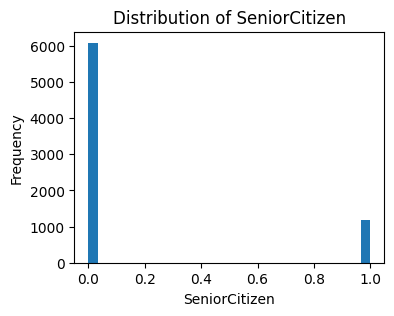

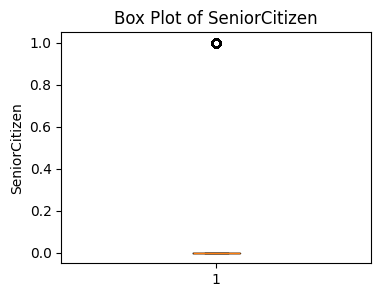

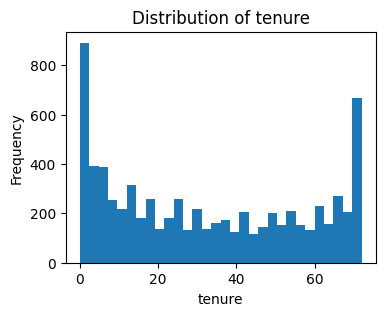

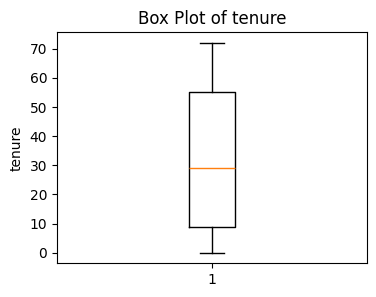

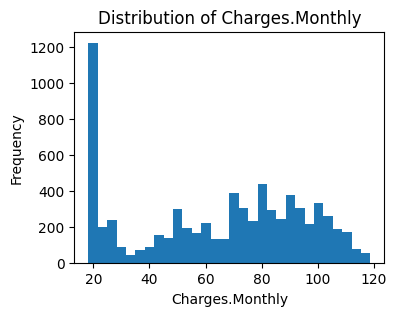

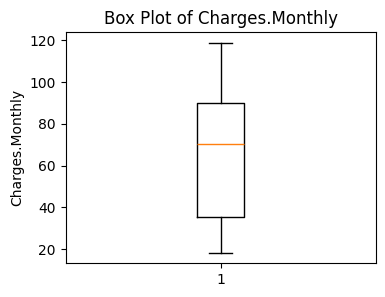

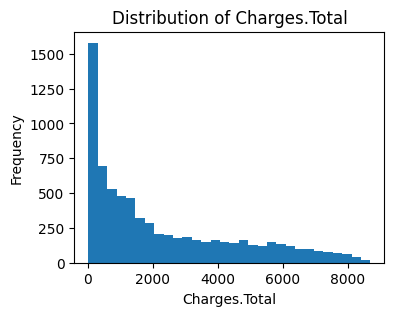

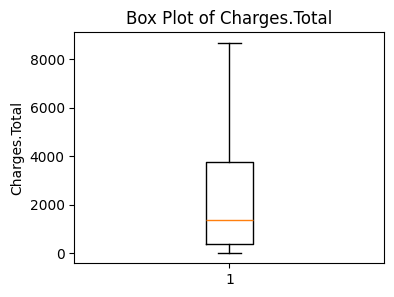

In [ ]:
import matplotlib.pyplot as plt

numerical_cols = ['SeniorCitizen', 'tenure', 'Charges.Monthly', 'Charges.Total']

for col in numerical_cols:
    # Histogram
    plt.figure(figsize=(4, 3))
    plt.hist(df[col].dropna(), bins=30)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {col}')
    plt.show()

    # Box plot
    plt.figure(figsize=(4, 3))
    plt.boxplot(df[col].dropna())
    plt.ylabel(col)
    plt.title(f'Box Plot of {col}')
    plt.show()

## Visualize categorical distributions

### Subtask:
Create bar plots for categorical columns to visualize the frequency of each category and understand the distribution of customers across different categories.


**Reasoning**:
Identify and iterate through categorical columns, calculate value counts, and create bar plots for each to visualize distributions.



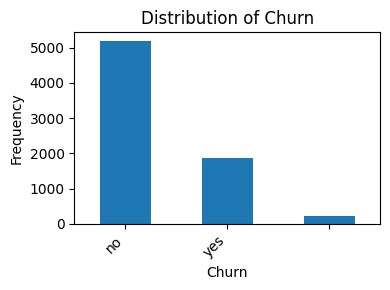

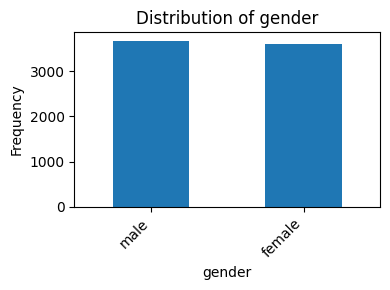

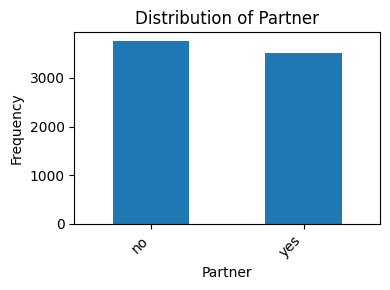

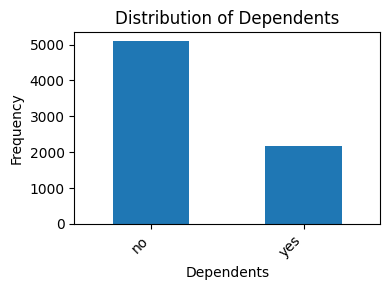

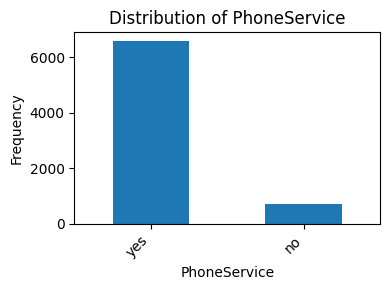

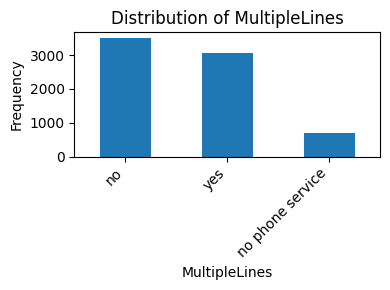

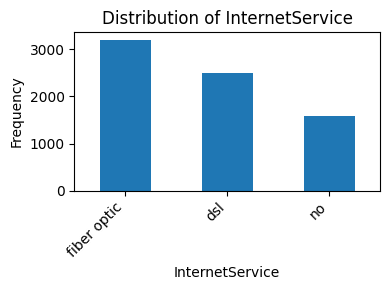

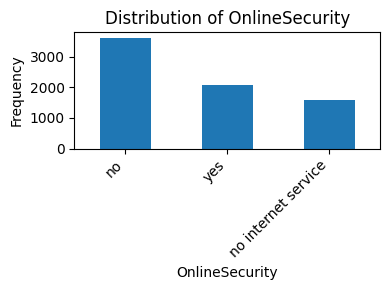

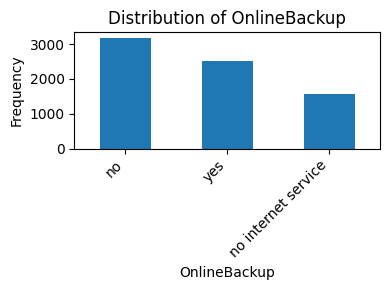

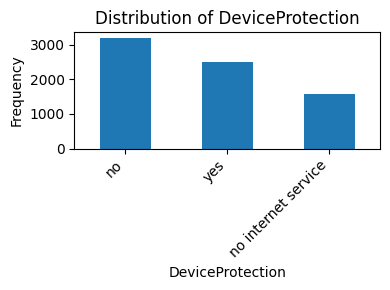

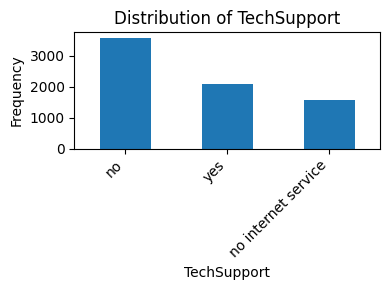

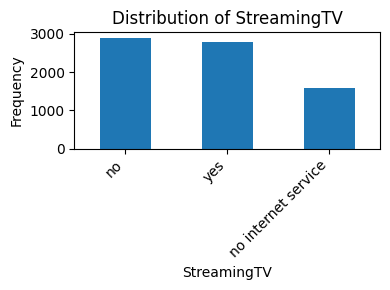

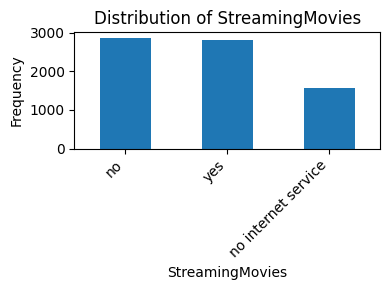

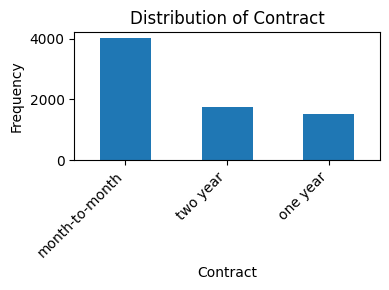

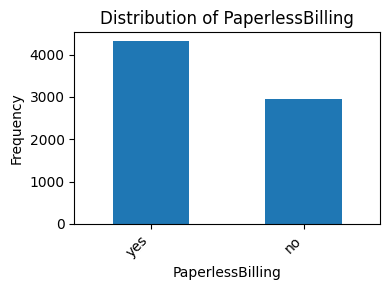

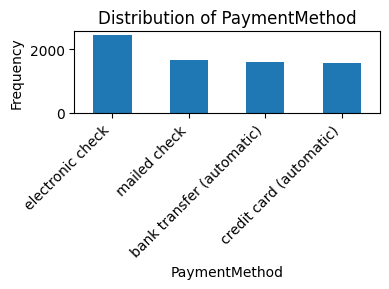

In [ ]:
import matplotlib.pyplot as plt

categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(4, 3))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## Visualize relationships between variables

### Subtask:
Visualize relationships between variables by creating scatter plots, box plots, or other appropriate visualizations to explore the relationships between different columns, especially between features and the target variable 'Churn'.


**Reasoning**:
Create the requested visualizations to explore relationships between variables and the target variable 'Churn'.



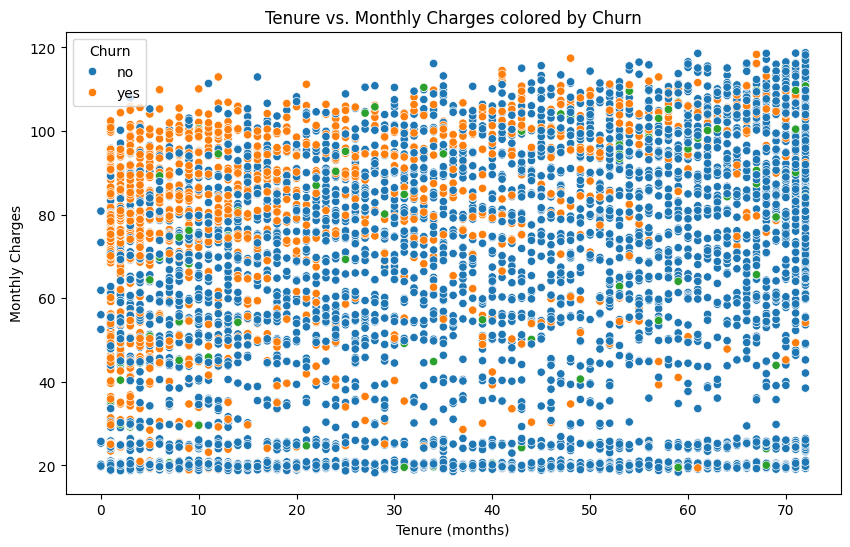

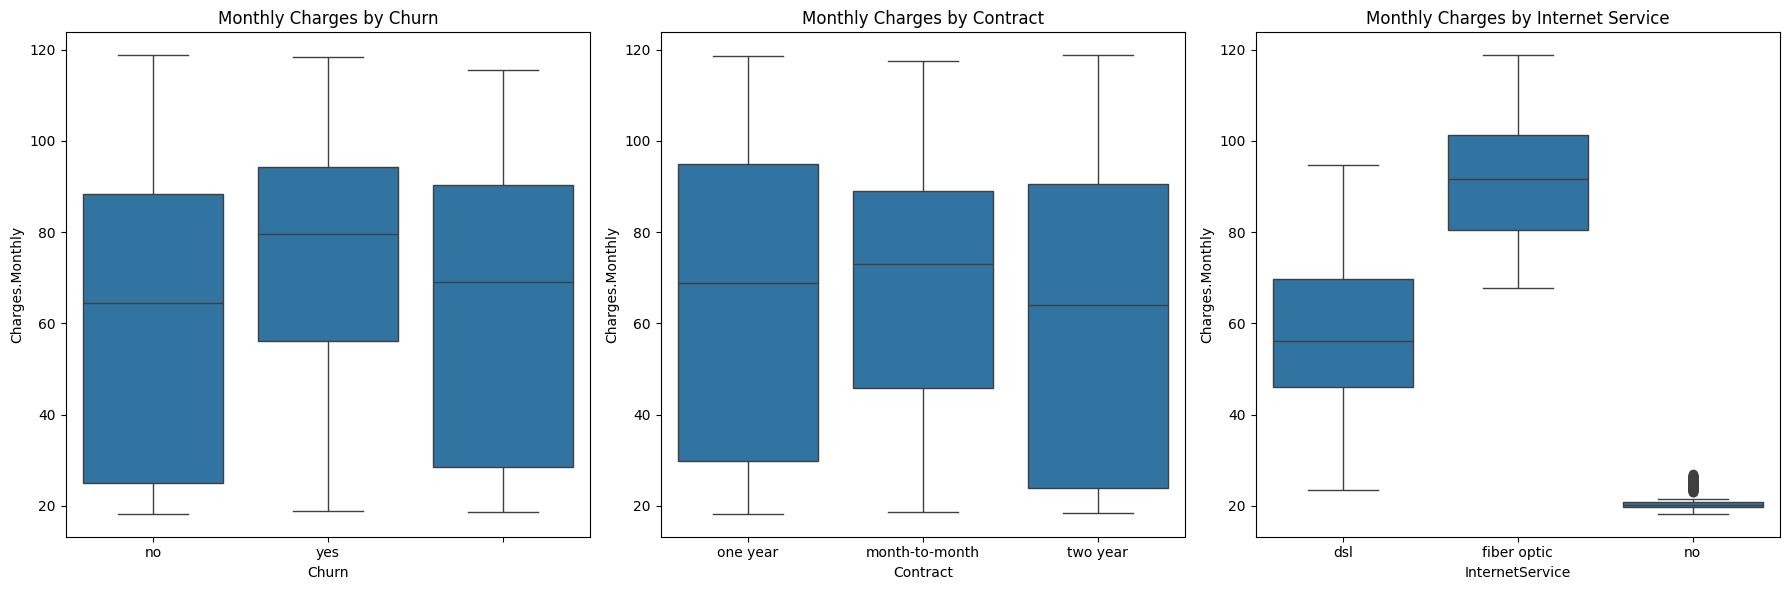

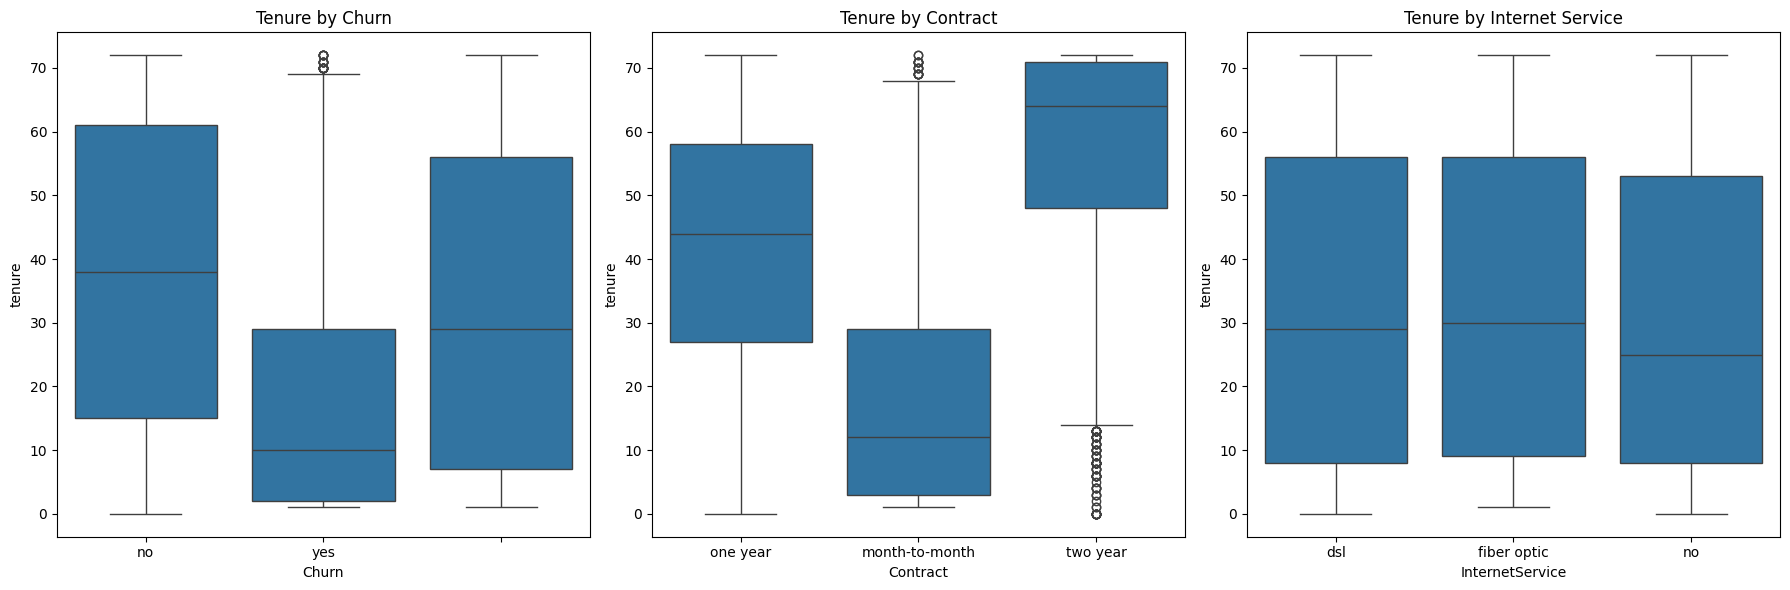

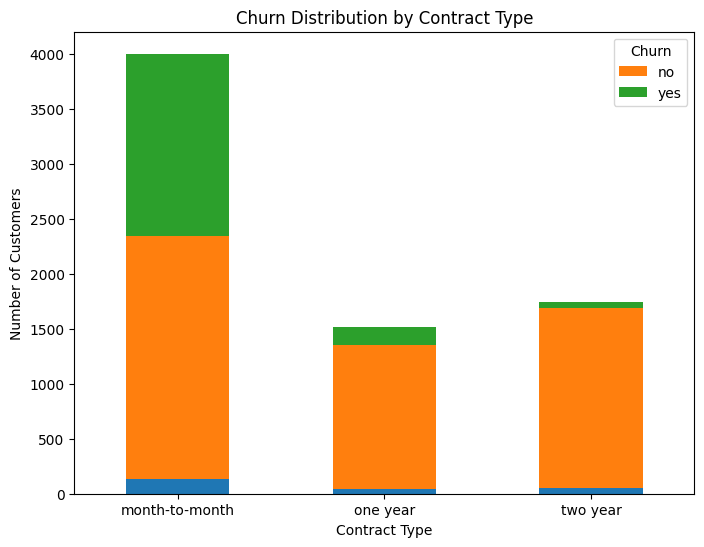

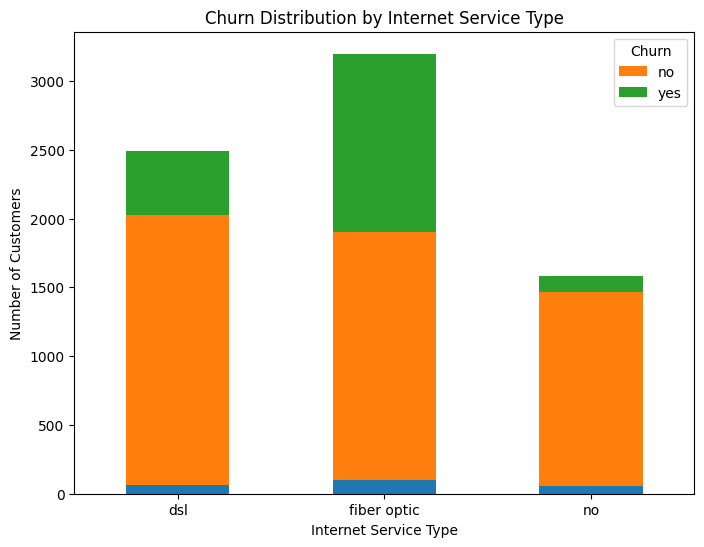

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Scatter plot of 'tenure' vs. 'Charges.Monthly', coloring points by 'Churn'.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='tenure', y='Charges.Monthly', hue='Churn')
plt.title('Tenure vs. Monthly Charges colored by Churn')
plt.xlabel('Tenure (months)')
plt.ylabel('Monthly Charges')
plt.show()

# 2. Box plots showing 'Charges.Monthly' distribution for each category of 'Churn', 'Contract', and 'InternetService'.
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.boxplot(data=df, x='Churn', y='Charges.Monthly', ax=axes[0])
axes[0].set_title('Monthly Charges by Churn')
sns.boxplot(data=df, x='Contract', y='Charges.Monthly', ax=axes[1])
axes[1].set_title('Monthly Charges by Contract')
sns.boxplot(data=df, x='InternetService', y='Charges.Monthly', ax=axes[2])
axes[2].set_title('Monthly Charges by Internet Service')
plt.tight_layout()
plt.show()

# 3. Box plots showing 'tenure' distribution for each category of 'Churn', 'Contract', and 'InternetService'.
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.boxplot(data=df, x='Churn', y='tenure', ax=axes[0])
axes[0].set_title('Tenure by Churn')
sns.boxplot(data=df, x='Contract', y='tenure', ax=axes[1])
axes[1].set_title('Tenure by Contract')
sns.boxplot(data=df, x='InternetService', y='tenure', ax=axes[2])
axes[2].set_title('Tenure by Internet Service')
plt.tight_layout()
plt.show()

# 4. Stacked bar plot showing the distribution of 'Churn' for each category of 'Contract'.
contract_churn = df.groupby(['Contract', 'Churn']).size().unstack()
contract_churn.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Churn Distribution by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.show()

# 5. Stacked bar plot showing the distribution of 'Churn' for each category of 'InternetService'.
internet_churn = df.groupby(['InternetService', 'Churn']).size().unstack()
internet_churn.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Churn Distribution by Internet Service Type')
plt.xlabel('Internet Service Type')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.show()

## Analyze and summarize findings

### Subtask:
Interpret the generated statistics and visualizations to summarize the key insights about customer distribution and behavior.


**Reasoning**:
Synthesize the findings from the previous steps into a summary report based on the descriptive statistics and visualizations.



In [ ]:
print("Customer Distribution and Behavior Analysis Summary Report\n")

print("1. Descriptive Statistics Summary:")
print("- Numerical columns ('SeniorCitizen', 'tenure', 'Charges.Monthly', 'Charges.Total'):")
print("  - SeniorCitizen: Binary variable (0 or 1), indicating presence of senior citizens in the dataset.")
print("  - tenure: Ranges from 0 to 72 months, with a mean and standard deviation providing insight into the typical customer relationship duration.")
print("  - Charges.Monthly: Ranges from 18.25 to 118.75, showing the variation in monthly costs.")
print("  - Charges.Total: Ranges from 18.8 to 8684.8, with 11 missing values, indicating the cumulative charges over tenure.")
print("- Categorical columns:")
print("  - Churn: The target variable, with a significant number of customers who have not churned ('no') but also a notable portion who have ('yes'), plus some missing values ('').")
print("  - gender, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod: Show the frequency distribution of customers across different service preferences, demographics, and contract/payment types.")
print("-" * 30)

print("\n2. Numerical Distribution Visualization Insights:")
print("- Histograms and Box Plots for 'SeniorCitizen': Confirm its binary nature and distribution.")
print("- Histograms and Box Plots for 'tenure': Show a distribution skewed towards shorter tenures, with a peak at the lowest values and another peak at the highest values, suggesting a mix of new and long-term customers. Box plot indicates no significant outliers.")
print("- Histograms and Box Plots for 'Charges.Monthly': Appear to have multiple peaks, suggesting different pricing tiers or service bundles. Box plot shows no significant outliers.")
print("- Histograms and Box Plots for 'Charges.Total': Skewed towards lower values, which is expected given the tenure distribution. Box plot shows potential outliers at higher total charges.")
print("-" * 30)

print("\n3. Categorical Distribution Visualization Insights:")
print("- Bar plots reveal the proportion of customers in each category for various features.")
print("  - Gender: Approximately equal distribution between male and female customers.")
print("  - Partner and Dependents: More customers without partners or dependents.")
print("  - PhoneService: Majority of customers have phone service.")
print("  - InternetService: Fiber optic is the most common internet service, followed by DSL and then no internet service.")
print("  - Contract: Month-to-month contracts are the most prevalent, followed by Two year and One year contracts.")
print("  - PaperlessBilling: More customers use paperless billing.")
print("  - PaymentMethod: Electronic check is the most frequent payment method.")
print("  - Service-specific features (OnlineSecurity, OnlineBackup, etc.): Distributions show the adoption rates of various add-on services.")
print("-" * 30)

print("\n4. Relationships Between Variables and Churn Insights:")
print("- Scatter plot of 'tenure' vs. 'Charges.Monthly' colored by 'Churn': Customers with shorter tenure and higher monthly charges appear to have a higher likelihood of churning.")
print("- Box plots of 'Charges.Monthly' by 'Churn', 'Contract', and 'InternetService':")
print("  - Churn: Churned customers tend to have higher median monthly charges compared to non-churned customers.")
print("  - Contract: Monthly charges are highest for month-to-month contracts.")
print("  - InternetService: Fiber optic users have significantly higher monthly charges.")
print("- Box plots of 'tenure' by 'Churn', 'Contract', and 'InternetService':")
print("  - Churn: Churned customers have a significantly lower median tenure than non-churned customers.")
print("  - Contract: Customers with one-year and two-year contracts have much longer tenures than those with month-to-month contracts.")
print("  - InternetService: Customers with no internet service or DSL tend to have longer tenures than fiber optic users.")
print("- Stacked bar plot of 'Churn' distribution by 'Contract': Month-to-month contracts exhibit a considerably higher churn rate than one-year and two-year contracts.")
print("- Stacked bar plot of 'Churn' distribution by 'InternetService': Customers with fiber optic internet service have a notably higher churn rate compared to DSL and no internet service.")
print("-" * 30)

print("\n5. Overall Synthesis and Key Insights:")
print("Based on the analysis of customer distribution and behavior, several key insights emerge regarding churn:")
print("- **Tenure:** Shorter tenure is strongly associated with higher churn.")
print("- **Monthly Charges:** Higher monthly charges are linked to increased churn.")
print("- **Contract Type:** Month-to-month contracts have the highest churn rate, indicating that longer-term contracts are effective in retaining customers.")
print("- **Internet Service:** Fiber optic internet service is associated with a higher churn rate compared to other internet service types.")
print("- **Customer Profile:** Churn is more prevalent among customers with shorter tenures and higher monthly charges, often on month-to-month contracts and using fiber optic internet.")
print("These findings suggest that strategies focused on retaining newer customers, managing monthly costs, promoting longer-term contracts, and addressing potential issues with fiber optic service could be crucial in reducing churn.")

Customer Distribution and Behavior Analysis Summary Report

1. Descriptive Statistics Summary:
- Numerical columns ('SeniorCitizen', 'tenure', 'Charges.Monthly', 'Charges.Total'):
  - SeniorCitizen: Binary variable (0 or 1), indicating presence of senior citizens in the dataset.
  - tenure: Ranges from 0 to 72 months, with a mean and standard deviation providing insight into the typical customer relationship duration.
  - Charges.Monthly: Ranges from 18.25 to 118.75, showing the variation in monthly costs.
  - Charges.Total: Ranges from 18.8 to 8684.8, with 11 missing values, indicating the cumulative charges over tenure.
- Categorical columns:
  - Churn: The target variable, with a significant number of customers who have not churned ('no') but also a notable portion who have ('yes'), plus some missing values ('').
  - gender, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Co

## Summary:

### Data Analysis Key Findings

*   Numerical columns (`SeniorCitizen`, `tenure`, `Charges.Monthly`, and `Charges.Total`) were analyzed, revealing distributions and potential outliers in `Charges.Total`.
*   Categorical columns showed that most customers did not churn, were male, and had no partners or dependents. Month-to-month contracts and fiber optic internet service were the most prevalent.
*   Visualizations indicated that customers with shorter tenure and higher monthly charges are more likely to churn.
*   Churned customers tend to have higher median monthly charges and significantly lower median tenure compared to non-churned customers.
*   Month-to-month contracts and fiber optic internet service exhibit considerably higher churn rates compared to other contract and internet service types.

### Insights or Next Steps

*   Focus retention efforts on customers with shorter tenure and higher monthly charges, particularly those on month-to-month contracts or with fiber optic internet.
*   Investigate the reasons behind the high churn rate among fiber optic users to identify potential service quality issues or pricing concerns.
